<a href="https://colab.research.google.com/github/runningPanda666/StudyHours/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1: Prediction Using Supervised Machine Learning

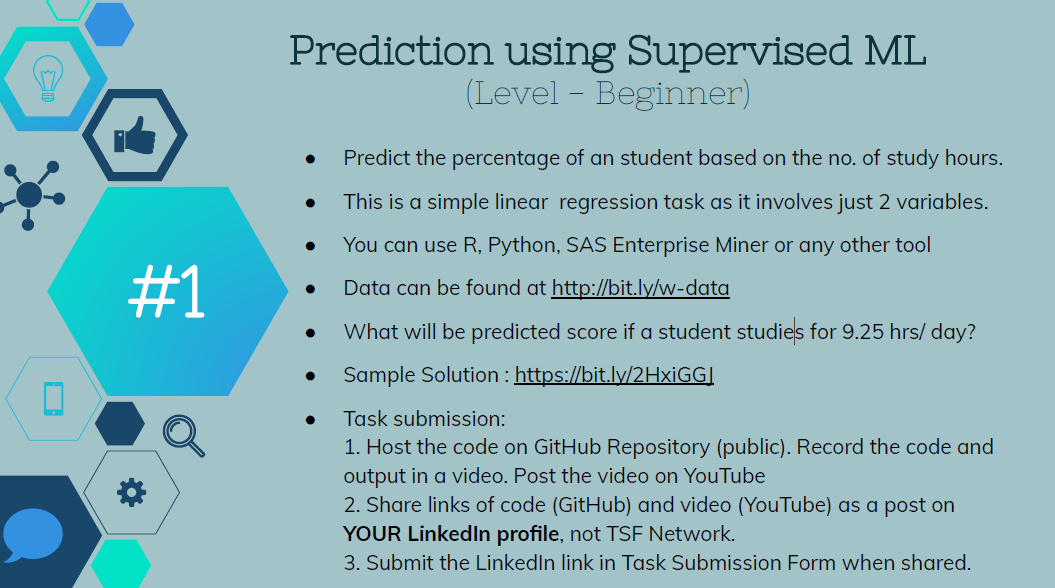


In [14]:
# Importing Pandas, NumPy, Matplotlib and Seaborn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sas
import io

## **Next, we will derive the dataset made available to us by GRIP.**

In [15]:
from google.colab import files
uploaded = files.upload()

Saving StudyHours.csv to StudyHours.csv


In [26]:
df = pd.read_csv(io.BytesIO(uploaded['StudyHours.csv']))
print("The dataset has been uploaded successfully")
print('The number of rows and colums in this dataset is given by',df.shape)
df

The dataset has been uploaded successfully
The number of rows and colums in this dataset is given by (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


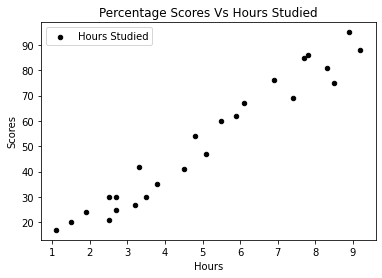

In [40]:
df.plot.scatter(x='Hours',y='Scores',c='black',label='Hours Studied',title='Percentage Scores Vs Hours Studied')

In [49]:
h_val = df.iloc[:, :-1].values  
s_val = df.iloc[:, 1].values 
print('Hours column', h_val.shape)
print('Hours column', s_val.shape)

Hours column (25, 1)
Hours column (25,)


In [52]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(h_val, s_val, 
                            test_size=0.2, random_state=0)

In [53]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


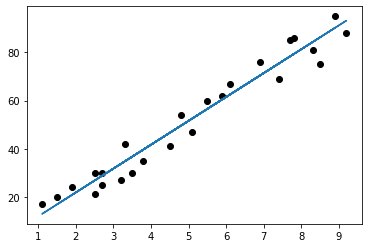

In [62]:
# Plotting the regression line
line = regressor.coef_*h_val+regressor.intercept_

# Plotting for the test data
plt.scatter(h_val, s_val, c='black')
plt.plot(h_val, line);
plt.show()

In [63]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [64]:
# Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [65]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [67]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(r2)

0.9454906892105354
